# Trading Strategies

Let's start with a classic and simple trading strategy: the moving average crossover. The idea behind this strategy is to buy a stock when its fast simple moving average (SMA) crosses above its slow SMA and to short it when the fast SMA crosses below the slow SMA.

Let's start with our imports in the cell below, and preparing our data frame in the cell below that.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

This time we'll fetch our data directly from yfinance.

In [3]:
import yfinance as yf 
# create a dataframe and load data

df = yf.download("JPM", start="2025-01-01") # Here you can pull stock tickers and index stickers # JPM is a ticker symbol, like short codes, AAPL – Apple Inc. GOOGL – Alphabet Inc. (Google)
# if no start date, will pull everything from yahoo
# check dataframe
df

/tmp/ipykernel_1619/2982987703.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("JPM", start="2025-01-01") # Here you can pull stock tickers and index stickers # JPM is a ticker symbol, like short codes, AAPL – Apple Inc. GOOGL – Alphabet Inc. (Google)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,JPM,JPM,JPM,JPM,JPM
Date,,,,,
2025-01-02,237.305161,240.548330,236.761333,238.214828,9220900
2025-01-03,240.548340,242.130380,237.562246,241.151491,9491100
2025-01-06,239.375565,244.185931,239.107213,242.208108,9917800
2025-01-07,241.681351,243.758552,239.425243,240.657657,8753400
2025-01-08,241.641602,242.754740,239.027697,241.263923,8675300
...,...,...,...,...,...
2025-06-16,270.359985,271.730011,266.850006,267.000000,8566000
2025-06-17,269.519989,270.589996,267.799988,268.170013,6739300


In [4]:
# however, we have multi index, we can use drop cplumns to drop one
df.columns = df.columns.droplevel(1) #drop the "JPM"
df

Price,Close,High,Low,Open,Volume
Date,,,,,
2025-01-02,237.305161,240.548330,236.761333,238.214828,9220900
2025-01-03,240.548340,242.130380,237.562246,241.151491,9491100
2025-01-06,239.375565,244.185931,239.107213,242.208108,9917800
2025-01-07,241.681351,243.758552,239.425243,240.657657,8753400
2025-01-08,241.641602,242.754740,239.027697,241.263923,8675300
...,...,...,...,...,...
2025-06-16,270.359985,271.730011,266.850006,267.000000,8566000
2025-06-17,269.519989,270.589996,267.799988,268.170013,6739300
2025-06-18,273.959991,277.720001,269.720001,270.000000,9586400


## Compute and Plot SMAs

Before we can implement our strategy, we need to calculate the fast (short-term) and slow (long-term) SMAs. For this example, we'll use 20-day and 50-day SMAs.

In [5]:
# the crossover of the two lines may indicate a moment to buy or sell
df
# if we want to define a variable that we always gonna use, we can define it as a constant, all uppercase 
FAST = 5 # 5 days
SLOW = 10 # 10 days

df["FastMA"] = df.Close.rolling(FAST).mean()
df["SlowMA"] = df.Close.rolling(SLOW).mean()
df


Price,Close,High,Low,Open,Volume,FastMA,SlowMA
Date,,,,,,,
2025-01-02,237.305161,240.548330,236.761333,238.214828,9220900,NaN,NaN
2025-01-03,240.548340,242.130380,237.562246,241.151491,9491100,NaN,NaN
2025-01-06,239.375565,244.185931,239.107213,242.208108,9917800,NaN,NaN
2025-01-07,241.681351,243.758552,239.425243,240.657657,8753400,NaN,NaN
2025-01-08,241.641602,242.754740,239.027697,241.263923,8675300,240.110403,NaN
...,...,...,...,...,...,...,...
2025-06-16,270.359985,271.730011,266.850006,267.000000,8566000,268.059998,266.520999
2025-06-17,269.519989,270.589996,267.799988,268.170013,6739300,268.243994,266.845999
2025-06-18,273.959991,277.720001,269.720001,270.000000,9586400,269.405994,267.819998



Remember we'll have a window-length of NaNs in our data frame. This is because we don't have enough data points to calculate an N-day moving average until the Nth day. 
Let's plot the closing price with the SMAs to visually inspect the crossover points.

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

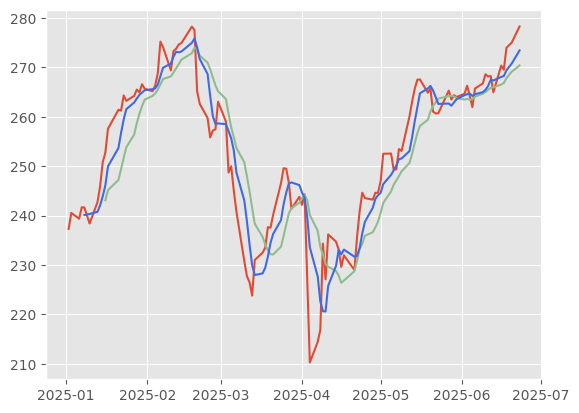

In [6]:
# to visualise the cross point
# figure, size, title, xlabel, ylabel, legend are all basic elements of plots
plt.plot(df.Close, label="Close") # Close line
plt.plot(df.SlowMA, label="Slow MA", color="darkseagreen")
plt.plot(df.FastMA, label="Fast MA", color="royalblue")
plt.legend
plt.tight_layout
# when the fast MA cross above the slow one, upswing coming, so to buy


## The Crossover

To determine the crossover points, we will create a new column signal which will contain 1 for buy signals (when the fast SMA is above the slow SMA) and -1 for sell signals. Because we are in a *wait* position while we *wait* for the 200-day SMA to kick-in, we'll fill the Signal column with 0 for those rows. We'll use `where()` for both of these.

In [7]:
# on each day, i want a signal, am i in a buy or sell position
df["Signal"] = np.where(df.FastMA > df.SlowMA, 1, -1) # np.where is a little if statement 
df.Signal = np.where(df.SlowMA.isna(), 0, df.Signal) #if Slow ma is na, signal should be 0, not in trading position at all. if have values, just signals
df




Price,Close,High,Low,Open,Volume,FastMA,SlowMA,Signal
Date,,,,,,,,
2025-01-02,237.305161,240.548330,236.761333,238.214828,9220900,NaN,NaN,0
2025-01-03,240.548340,242.130380,237.562246,241.151491,9491100,NaN,NaN,0
2025-01-06,239.375565,244.185931,239.107213,242.208108,9917800,NaN,NaN,0
2025-01-07,241.681351,243.758552,239.425243,240.657657,8753400,NaN,NaN,0
2025-01-08,241.641602,242.754740,239.027697,241.263923,8675300,240.110403,NaN,0
...,...,...,...,...,...,...,...,...
2025-06-16,270.359985,271.730011,266.850006,267.000000,8566000,268.059998,266.520999,1
2025-06-17,269.519989,270.589996,267.799988,268.170013,6739300,268.243994,266.845999,1
2025-06-18,273.959991,277.720001,269.720001,270.000000,9586400,269.405994,267.819998,1


### Exercise: Blink and you'll miss it

Can you identify on which dates we had a crossover?

In [8]:
## use diff()to find the difference between adjacent rows of a dateframe 
## a crossover difference is either 2 or -2
# you may need &(and) | (or)
df[ (df.Signal.diff() == -2) | (df.Signal.diff() == 2) ]

Price,Close,High,Low,Open,Volume,FastMA,SlowMA,Signal
Date,,,,,,,,
2025-02-21,262.622375,267.552033,261.230952,266.677416,12835600,271.692505,272.365359,-1
2025-03-20,237.546814,240.279979,234.754019,235.111816,8328500,234.447906,232.188824,1
2025-04-02,244.315140,245.736378,239.981830,240.120973,7758800,243.649240,244.157111,-1
2025-04-14,234.720001,239.779999,233.630005,237.100006,13017800,229.847998,228.773351,1
2025-05-23,260.709991,261.989990,256.000000,256.809998,6671800,262.596002,263.673001,-1
2025-06-02,264.660004,265.029999,261.899994,263.019989,6011200,264.362000,263.479001,1


## Backtesting

Backtesting is the process of testing a trading strategy on relevant historical data. We can calculate how it would have performed, had it been applied in the past. The simplest backtest calculates the returns that would have been realised if the strategy was implemented.

First, we create a new column with the signal from the previous day. When we backtest, we have to imagine we're trading in real time. Since our signals are based on close prices, we won't be able to act on them until the following day when the market re-opens. Failing to do this is called *look-ahead bias*.

In [9]:
df.loc["2025-02-18":"2025-02-24"]

df.Signal = df.Signal.shift() # a new column position 
df.loc["2025-02-18":"2025-02-24"]

Price,Close,High,Low,Open,Volume,FastMA,SlowMA,Signal
Date,,,,,,,,
2025-02-18,278.236206,278.256073,274.330242,275.065732,7919800,274.966339,272.860309,1.0
2025-02-19,277.540497,278.534375,275.522925,276.675828,7007200,275.813129,273.984387,1.0
2025-02-20,265.166687,277.033595,264.113179,276.973965,13846700,274.093713,273.623608,1.0
2025-02-21,262.622375,267.552033,261.230952,266.677416,12835600,271.692505,272.365359,1.0
2025-02-24,259.740112,265.365466,257.026814,263.864701,10372800,268.661176,270.928210,-1.0


Next we calculate the market daily returns normally using `pct_change()`. We then calculate our strategy returns by multiplying our buy/sell position with the market returns. Here is how it works:

- On days when the market gains (+ market return)
    - In the buy position (+) , our strategy gains
    - In the sell position (-), our strategy loses
- On days when the market loses (- market return)
    - In the buy position (+), our strategy loses
    - In the sell position (-), our strategy gains

In [10]:
df["Returns"] = df.Close.pct_change ()
df["Strategy"] = df.Returns * df.Signal
df

Price,Close,High,Low,Open,Volume,FastMA,SlowMA,Signal,Returns,Strategy
Date,,,,,,,,,,
2025-01-02,237.305161,240.548330,236.761333,238.214828,9220900,NaN,NaN,NaN,NaN,NaN
2025-01-03,240.548340,242.130380,237.562246,241.151491,9491100,NaN,NaN,0.0,0.013667,0.000000
2025-01-06,239.375565,244.185931,239.107213,242.208108,9917800,NaN,NaN,0.0,-0.004875,-0.000000
2025-01-07,241.681351,243.758552,239.425243,240.657657,8753400,NaN,NaN,0.0,0.009633,0.000000
2025-01-08,241.641602,242.754740,239.027697,241.263923,8675300,240.110403,NaN,0.0,-0.000164,-0.000000
...,...,...,...,...,...,...,...,...,...,...
2025-06-16,270.359985,271.730011,266.850006,267.000000,8566000,268.059998,266.520999,1.0,0.020419,0.020419
2025-06-17,269.519989,270.589996,267.799988,268.170013,6739300,268.243994,266.845999,1.0,-0.003107,-0.003107
2025-06-18,273.959991,277.720001,269.720001,270.000000,9586400,269.405994,267.819998,1.0,0.016474,0.016474


To determine if our strategy would profit or lose, we can calculate the cumulative returns of our strategy for the period. We can then compare it to a *buy & hold* strategy (where we buy at the start of the period and sell at the end), which is represented as the cumulative market returns.

In [ ]:
df["BuyHold"] = (1 + df.Returns).cumprod() - 1 # buy and hold strategy
df["MACS"] = (1 + df.Strategy).cumprod() - 1 # our strategy (moving average cross over startegy)
df.tail()

Price,Close,High,Low,Open,Volume,FastMA,SlowMA,Signal,Returns,Strategy,BuyHold,MACS
Date,,,,,,,,,,,,
2025-06-16,270.359985,271.730011,266.850006,267.000000,8566000,268.059998,266.520999,1.0,0.020419,0.020419,0.139292,0.337651
2025-06-17,269.519989,270.589996,267.799988,268.170013,6739300,268.243994,266.845999,1.0,-0.003107,-0.003107,0.135753,0.333495
2025-06-18,273.959991,277.720001,269.720001,270.000000,9586400,269.405994,267.819998,1.0,0.016474,0.016474,0.154463,0.355463
2025-06-20,275.000000,277.299988,273.809998,275.570007,13969700,270.757996,269.124997,1.0,0.003796,0.003796,0.158845,0.360609
2025-06-23,278.269989,278.549988,272.109985,275.059998,8085900,273.421991,270.378995,1.0,0.011891,0.011891,0.172625,0.376787


Let's plot these for a visual representation.

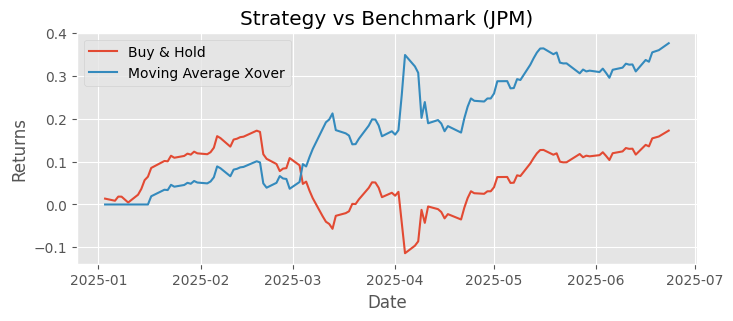

In [ ]:
plt.figure(figsize=(8, 3))
plt.title("Strategy vs Benchmark (JPM)")
plt.xlabel("Date")
plt.ylabel ("Returns")
plt.plot(df.BuyHold, label = "Buy & Hold")
plt.plot(df.MACS, label="Moving Average Xover")
plt.legend()
# in the beginning buy and hold is better, but when market turns down, wr are short, we gain during downturn 